<a href="https://colab.research.google.com/github/abhijeetraj22/INSAID_Task/blob/main/INSAID_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

### Importing the data

In [162]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
#import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import auc,roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV


In [164]:
# use these links to do so:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Telecom/Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [165]:
df.shape

(7043, 21)

### Understanding the data

In [166]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [168]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Data Manipulation

In [169]:
#checking null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [170]:
df.loc[936]

customerID            5709-LVOEQ
gender                    Female
SeniorCitizen                  0
Partner                      Yes
Dependents                   Yes
tenure                         0
PhoneService                 Yes
MultipleLines                 No
InternetService              DSL
OnlineSecurity               Yes
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                   No
StreamingTV                  Yes
StreamingMovies              Yes
Contract                Two year
PaperlessBilling              No
PaymentMethod       Mailed check
MonthlyCharges             80.85
TotalCharges                    
Churn                         No
Name: 936, dtype: object

In [171]:
df[df['TotalCharges'] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [172]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

In [173]:
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [174]:
df['TotalCharges'].isna().sum()

11

In [175]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [176]:
df['TotalCharges'].dtypes

dtype('float64')

**Since, we have 11 null values in dataset, either we can fill them, or remove them. 11 is a low number, so I will drop them.**

In [177]:
df.dropna(inplace = True)

In [178]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [179]:
df.shape

(7032, 21)

In [180]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [181]:
df.describe(exclude="number").T

,count,unique,top,freq
customerID,7032,7032,6950-TWMYB,1
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


### Data Visualization

In [182]:
cat_feats = [x for x in df.columns if df[x].dtype == "object" and x != "customerID"]
num_feats = [x for x in df.columns if df[x].dtype != "object"]

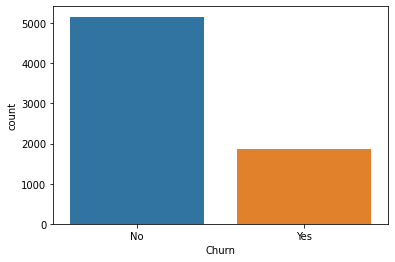

In [183]:
sns.countplot(x=df["Churn"]);

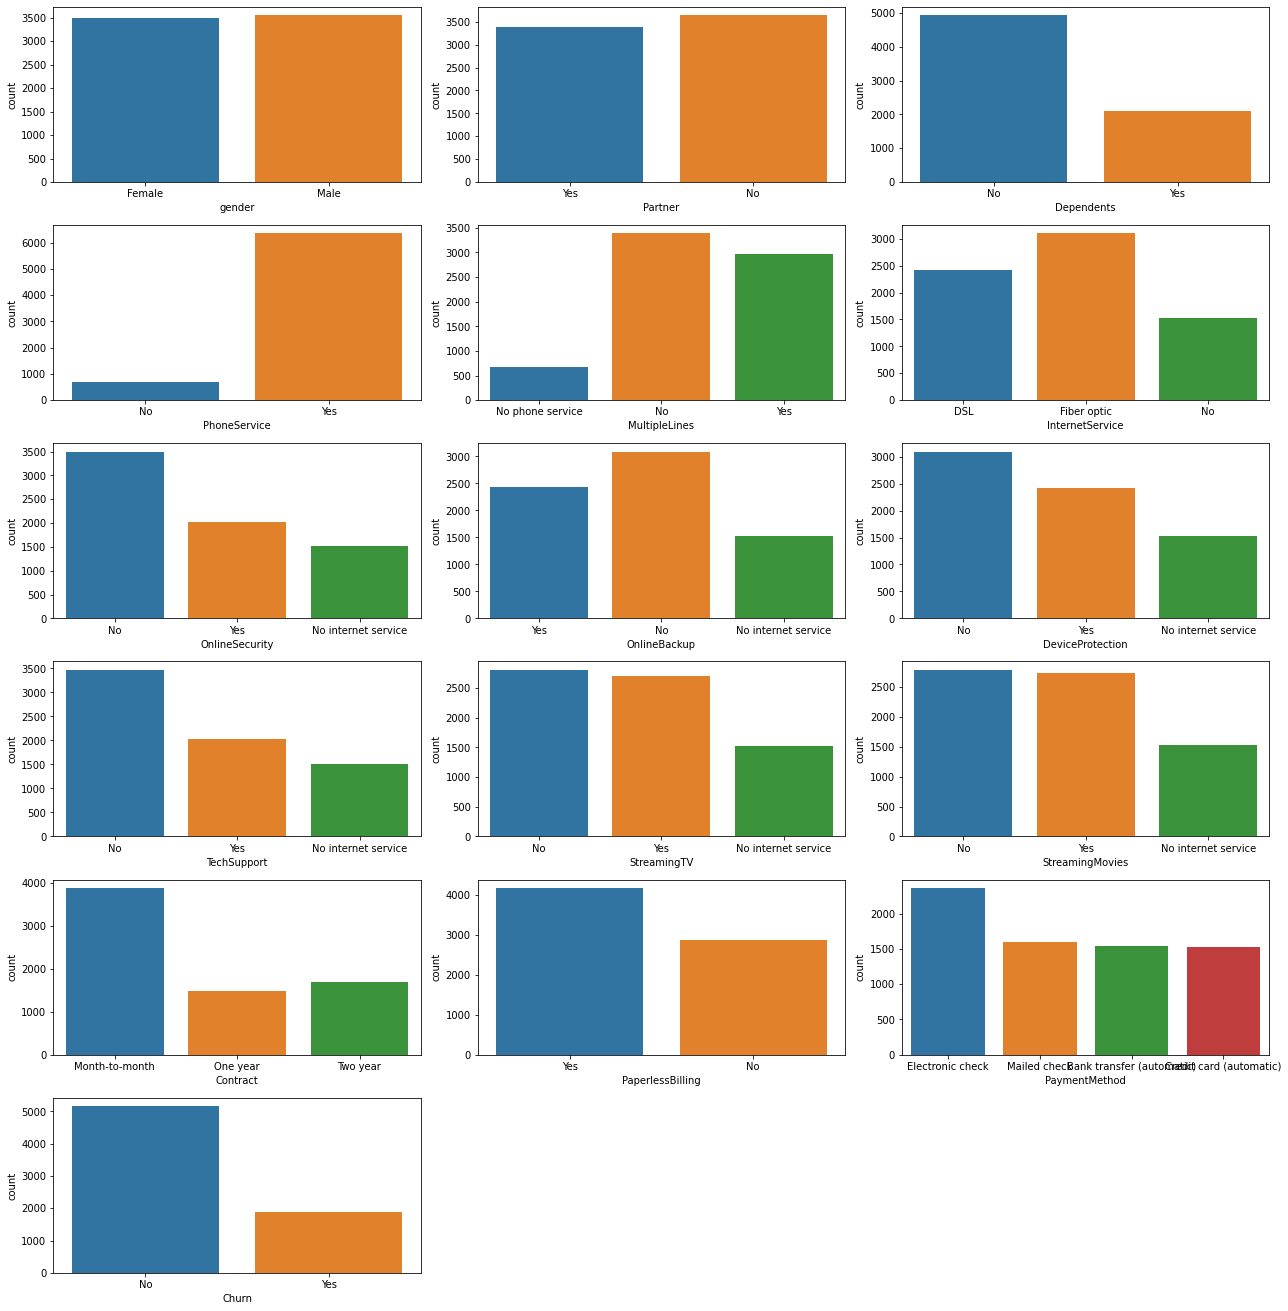

In [184]:
fig = plt.figure(figsize=(18, 30))

for i, col in enumerate(cat_feats):
    plt.subplot(10, 3, i+1)
    sns.countplot(x=df[col])
    plt.tight_layout()
fig.show()

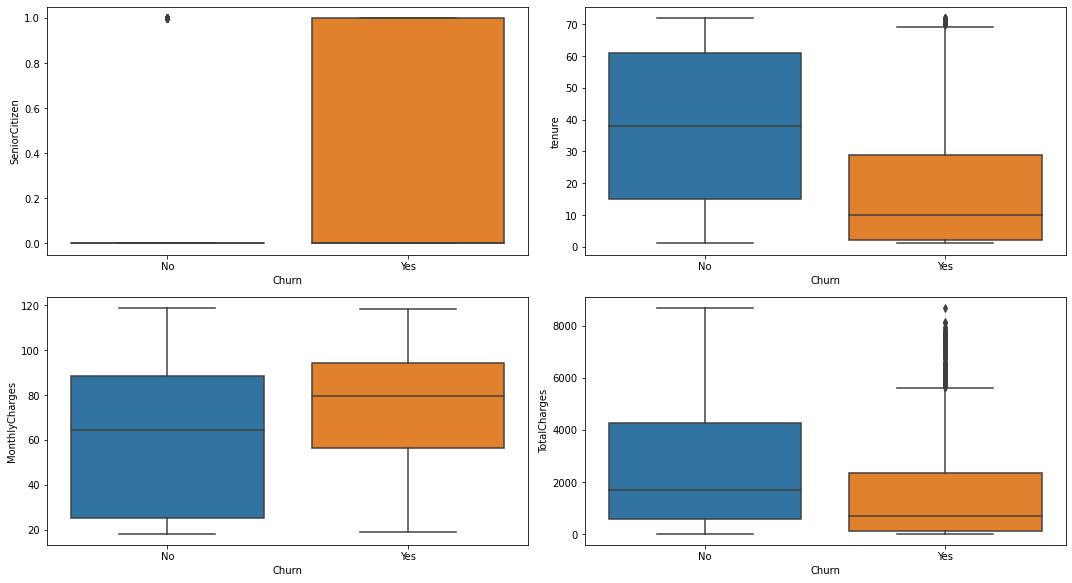

In [185]:
fig = plt.figure(figsize=(15, 40))

for i, col in enumerate(num_feats):
    plt.subplot(10, 2, i+1)
    sns.boxplot(x="Churn", y=col, data=df)
    plt.tight_layout()
fig.show()

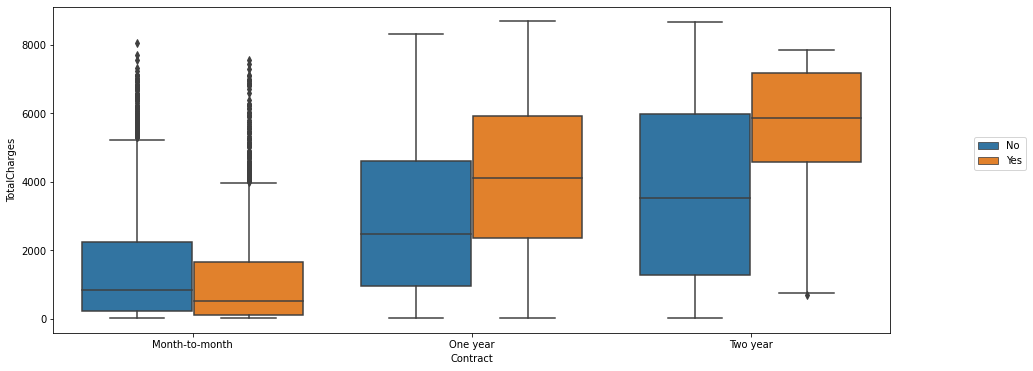

In [186]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x="Contract", y="TotalCharges", hue="Churn")
plt.legend(loc=(1.1, 0.5));

In [187]:
df["Churn"] = df["Churn"].apply(lambda x: 0 if x=="No" else 1)
num_feats.append("Churn")

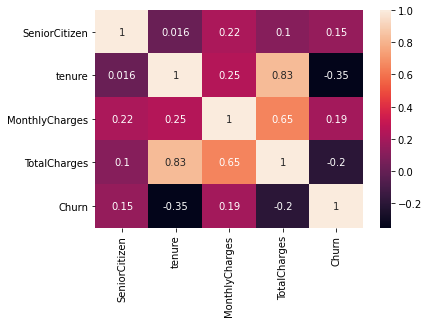

In [188]:
sns.heatmap(df[num_feats].corr(), annot=True)

In [189]:
cat_feats.remove("Churn")
df[num_feats]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


In [190]:
dummies_df = pd.get_dummies(df[cat_feats], drop_first=True)
new_df = pd.concat([dummies_df, df[num_feats]], axis=1)
new_df.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,29.85,29.85,0
1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,34,56.95,1889.50,0
2,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2,53.85,108.15,1
3,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,45,42.30,1840.75,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,2,70.70,151.65,1


**Churn Analysis**

In [191]:
new_df = new_df.sample(frac=1).reset_index(drop=True)

In [192]:
df["tenure"].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39])

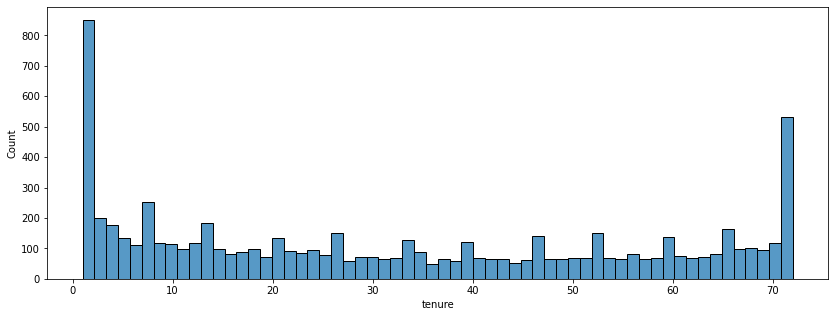

In [193]:
plt.figure(figsize=(14,5))
sns.histplot(data=df["tenure"], bins=60);

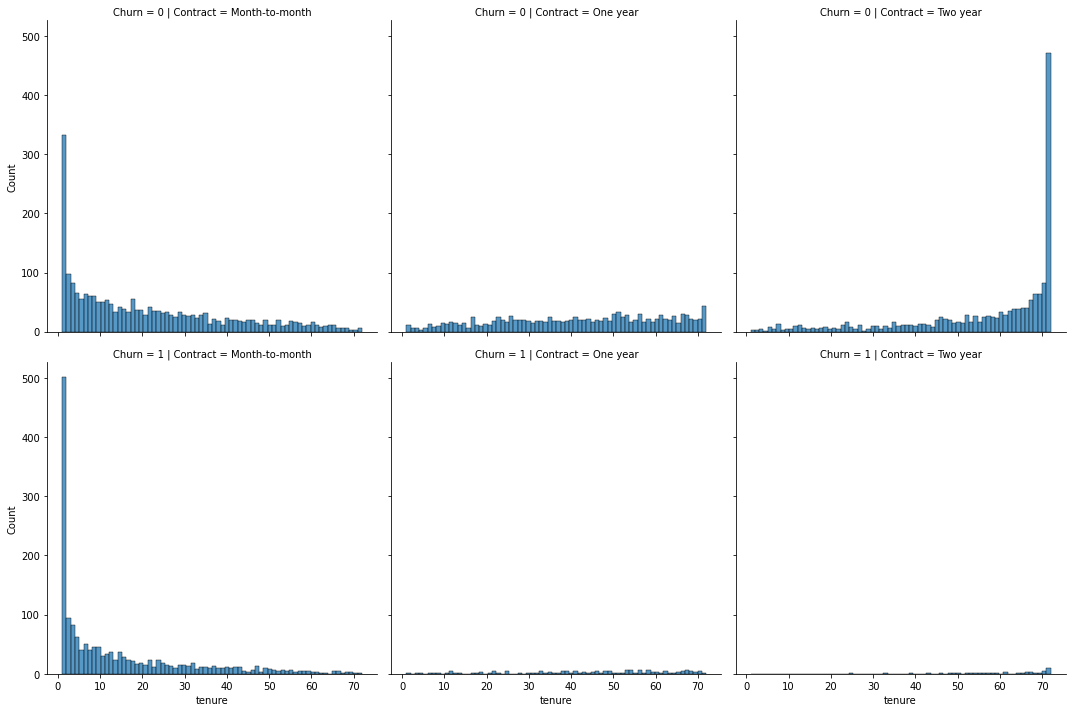

In [194]:
sns.displot(data=df, x="tenure", bins=70, col="Contract", row="Churn")

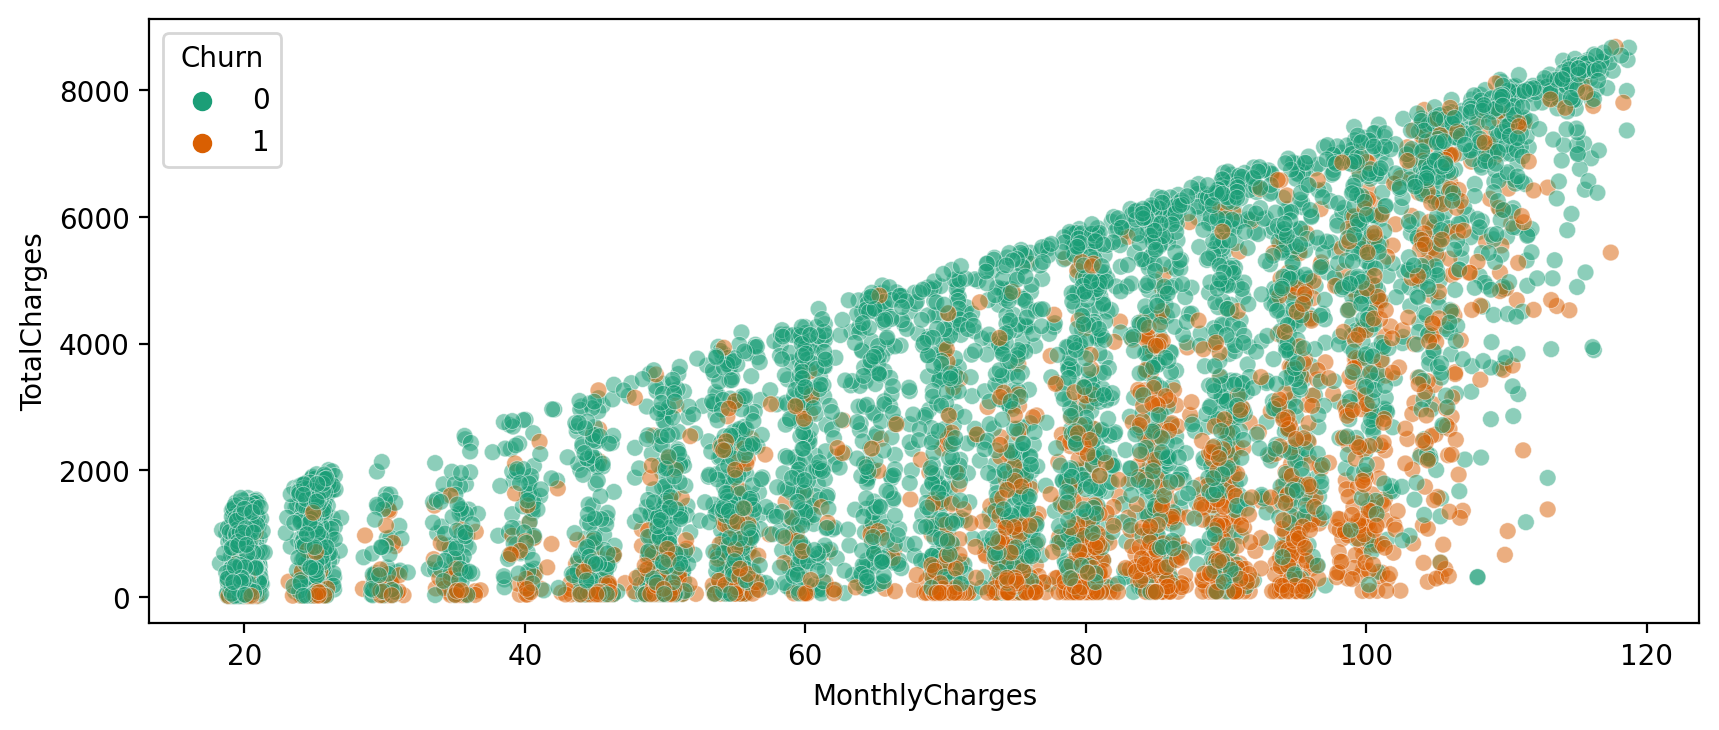

In [195]:
plt.figure(figsize=(10, 4), dpi=200)
sns.scatterplot(x=df["MonthlyCharges"], y=df["TotalCharges"], hue=df["Churn"], alpha=0.5,
                linewidth=0.3, palette="Dark2");

**Creating cohorts based on tenure**

In [196]:
df.groupby(["Churn", "tenure"]).count().transpose()[0]

tenure,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
customerID,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
gender,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
Partner,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
Dependents,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
PhoneService,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
MultipleLines,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
InternetService,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356
OnlineBackup,233,115,106,93,69,70,80,81,73,71,68,79,71,52,62,52,61,73,54,53,46,63,72,71,56,64,59,45,57,56,49,50,50,53,73,40,50,46,42,51,56,51,50,45,55,62,54,55,51,58,60,72,56,55,55,70,57,56,52,70,68,65,68,76,67,76,88,91,87,108,164,356


In [197]:
yes_churn = df.groupby(["Churn", "tenure"]).count().transpose()[1]
no_churn = df.groupby(["Churn", "tenure"]).count().transpose()[0]

In [198]:
churn_rate = 100 * yes_churn / (no_churn + yes_churn)
churn_rate.head()

tenure,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
customerID,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,31.313131,32.478632,34.862385,31.578947,37.373737,35.0,29.885057,24.742268,26.027397,25.352113,26.984127,30.0,15.294118,24.468085,29.113924,18.987342,18.055556,21.052632,20.833333,22.222222,24.615385,27.536232,21.875,18.461538,17.045455,20.0,23.076923,22.033898,25.0,20.3125,20.0,21.538462,23.076923,11.764706,9.836066,16.216216,20.588235,14.0625,22.727273,14.705882,11.764706,10.0,20.0,19.117647,14.0625,12.5,12.307692,16.41791,13.333333,7.894737,10.526316,7.142857,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
gender,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,31.313131,32.478632,34.862385,31.578947,37.373737,35.0,29.885057,24.742268,26.027397,25.352113,26.984127,30.0,15.294118,24.468085,29.113924,18.987342,18.055556,21.052632,20.833333,22.222222,24.615385,27.536232,21.875,18.461538,17.045455,20.0,23.076923,22.033898,25.0,20.3125,20.0,21.538462,23.076923,11.764706,9.836066,16.216216,20.588235,14.0625,22.727273,14.705882,11.764706,10.0,20.0,19.117647,14.0625,12.5,12.307692,16.41791,13.333333,7.894737,10.526316,7.142857,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
SeniorCitizen,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,31.313131,32.478632,34.862385,31.578947,37.373737,35.0,29.885057,24.742268,26.027397,25.352113,26.984127,30.0,15.294118,24.468085,29.113924,18.987342,18.055556,21.052632,20.833333,22.222222,24.615385,27.536232,21.875,18.461538,17.045455,20.0,23.076923,22.033898,25.0,20.3125,20.0,21.538462,23.076923,11.764706,9.836066,16.216216,20.588235,14.0625,22.727273,14.705882,11.764706,10.0,20.0,19.117647,14.0625,12.5,12.307692,16.41791,13.333333,7.894737,10.526316,7.142857,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
Partner,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,31.313131,32.478632,34.862385,31.578947,37.373737,35.0,29.885057,24.742268,26.027397,25.352113,26.984127,30.0,15.294118,24.468085,29.113924,18.987342,18.055556,21.052632,20.833333,22.222222,24.615385,27.536232,21.875,18.461538,17.045455,20.0,23.076923,22.033898,25.0,20.3125,20.0,21.538462,23.076923,11.764706,9.836066,16.216216,20.588235,14.0625,22.727273,14.705882,11.764706,10.0,20.0,19.117647,14.0625,12.5,12.307692,16.41791,13.333333,7.894737,10.526316,7.142857,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
Dependents,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,31.313131,32.478632,34.862385,31.578947,37.373737,35.0,29.885057,24.742268,26.027397,25.352113,26.984127,30.0,15.294118,24.468085,29.113924,18.987342,18.055556,21.052632,20.833333,22.222222,24.615385,27.536232,21.875,18.461538,17.045455,20.0,23.076923,22.033898,25.0,20.3125,20.0,21.538462,23.076923,11.764706,9.836066,16.216216,20.588235,14.0625,22.727273,14.705882,11.764706,10.0,20.0,19.117647,14.0625,12.5,12.307692,16.41791,13.333333,7.894737,10.526316,7.142857,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459


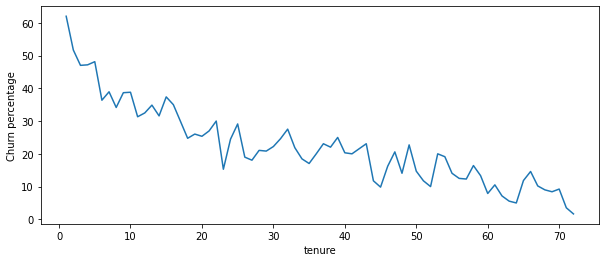

In [199]:
plt.figure(figsize=(10,4))
churn_rate.transpose()["customerID"].plot()
plt.ylabel("Churn percentage");

**Broader Cohort Groups**

In [200]:
def cohort(tenure):
    if tenure < 13:
        return "0-12 Months"
    elif tenure < 25:
        return "12-24 Months"
    elif tenure < 49:
        return "24-48 Months"
    else:
        return "Over 48 Months"

In [201]:
df["tenure_cohort"] = df["tenure"].apply(cohort)

In [202]:
df[["tenure", "tenure_cohort"]]

,tenure,tenure_cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7038,24,12-24 Months
7039,72,Over 48 Months
7040,11,0-12 Months
7041,4,0-12 Months


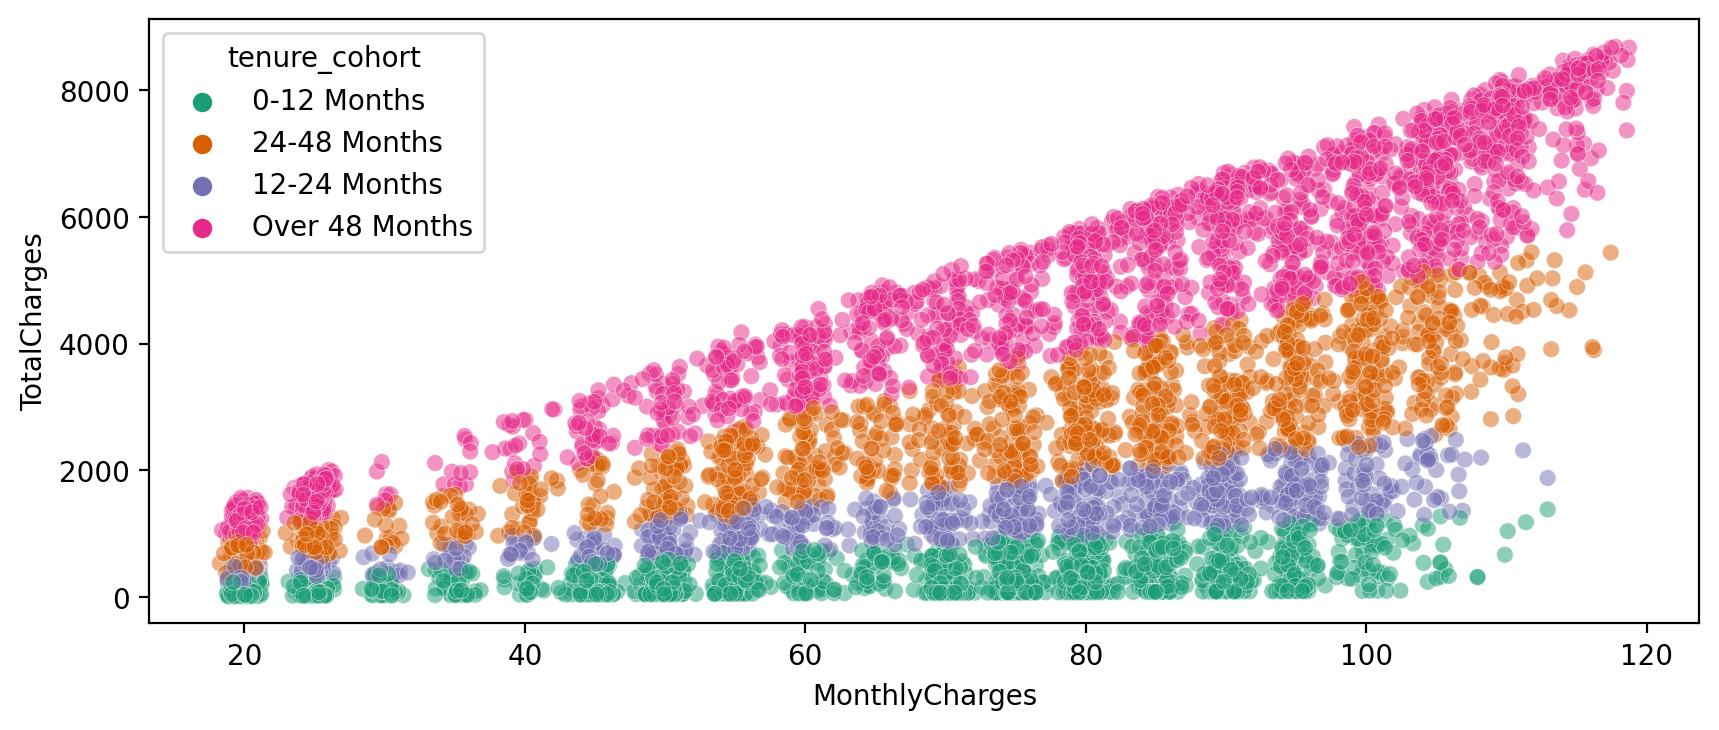

In [203]:
plt.figure(figsize=(10, 4), dpi=200)
sns.scatterplot(x=df["MonthlyCharges"], y=df["TotalCharges"], hue=df["tenure_cohort"], alpha=0.5,
                linewidth=0.3, palette="Dark2");

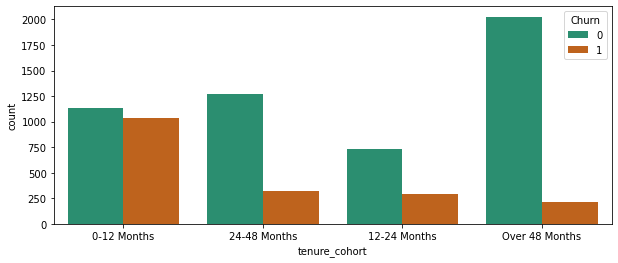

In [204]:
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='tenure_cohort',hue="Churn", palette="Dark2");

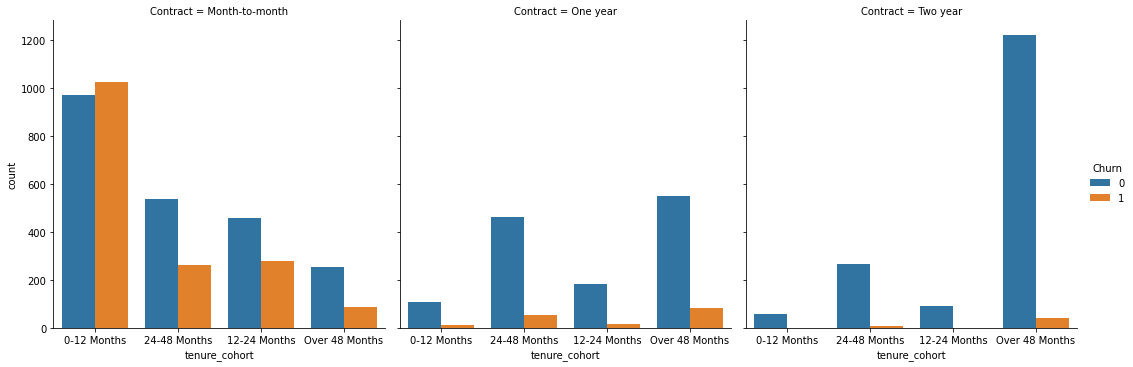

In [205]:
sns.catplot(data=df, x="tenure_cohort", hue="Churn", kind="count",col="Contract");

### Conclusion: 
**What all did you understand from the above charts**



- Tenure, Contract_Month to Month, Montly Charges, Total charges and Tech support no seem to contribute the most to the churn (Top 5)
- From the distribution plots, it can be inferred that customers make up their mind to terminate within the first 10 months
- Also, customers with a two year contract are less likely to churn than a month to month contract
- Additionaly customer support are good measures to prevent the company from losing customers. Also as inferred above, customer support enables multiple subscribers



### Implement Machine Learning Models

In [206]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [207]:
new_df.head()

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,3,50.15,160.85,0
1,1,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,72,19.30,1414.80,0
2,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,70,64.55,4504.90,0
3,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,0,0,0,72,89.05,6254.45,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,2,70.65,142.35,1


In [208]:
new_df["kfold"] = -1

skf = StratifiedKFold(n_splits=5)

for fold, (train_idx, valid_idx) in enumerate(skf.split(new_df, new_df["Churn"])):
    new_df.loc[valid_idx, "kfold"] = fold

In [209]:
def run_training(df, algo, fold):
    
    train_df = df[df.kfold != fold].reset_index(drop=True)
    valid_df = df[df.kfold == fold].reset_index(drop=True)
    
    xtrain = train_df.drop(["Churn", "kfold"], axis=1)
    xvalid = valid_df.drop(["Churn", "kfold"], axis=1)

    ytrain = train_df.Churn.values
    yvalid = valid_df.Churn.values
    
    model = algo
    model.fit(xtrain, ytrain)
    preds = model.predict(xvalid)
    
    fold_acc = accuracy_score(yvalid, preds)
    print(f"fold={fold}, acc={fold_acc}")
    
    return fold_acc, model, preds

In [210]:
y = new_df["Churn"].values

In [211]:
def run_training2(df, algo, fold):
    
    train_df = df[df.kfold != fold].reset_index(drop=True)
    valid_df = df[df.kfold == fold].reset_index(drop=True)
    
    xtrain = train_df.drop(["Churn", "kfold"], axis=1)
    xvalid = valid_df.drop(["Churn", "kfold"], axis=1)
    
    scaler = StandardScaler()
    x_train = scaler.fit_transform(xtrain)
    xvalid = scaler.transform(xvalid)

    ytrain = train_df.Churn.values
    yvalid = valid_df.Churn.values
    
    model = algo
    model.fit(xtrain, ytrain)
    preds = model.predict(xvalid)
    
    fold_acc = accuracy_score(yvalid, preds)
    print(f"fold={fold}, acc={fold_acc}")
    
    return fold_acc, model, preds

### Model Evaluation

**Decision Tree**

In [212]:
acc = []
all_preds = []
for f in range(5):
    dt = DecisionTreeClassifier()
    fold_acc, dt, preds = run_training(new_df, dt, f)
    acc.append(fold_acc)
    all_preds.append(preds)

print(f"Mean Acc={np.mean(acc)}")

all_pred = np.hstack(all_preds)
print(confusion_matrix(y, all_pred))
print(classification_report(y, all_pred))

fold=0, acc=0.7036247334754797
fold=1, acc=0.7370291400142146
fold=2, acc=0.7460881934566145
fold=3, acc=0.7275960170697012
fold=4, acc=0.7254623044096729
Mean Acc=0.7279600776851366
[[4170  993]
 [ 934  935]]
              precision    recall  f1-score   support

           0       0.82      0.81      0.81      5163
           1       0.48      0.50      0.49      1869

    accuracy                           0.73      7032
   macro avg       0.65      0.65      0.65      7032
weighted avg       0.73      0.73      0.73      7032



In [213]:
feat_imp = pd.DataFrame(dt.feature_importances_, index=new_df.drop(["Churn", "kfold"], axis=1).columns, columns=["Feat_Imp"])
feat_imp = feat_imp[feat_imp["Feat_Imp"] > 0].sort_values(by=["Feat_Imp"])
feat_imp.style.background_gradient(cmap="Spectral")

,Feat_Imp
PhoneService_Yes,0.000428
StreamingTV_No internet service,0.000459
InternetService_No,0.004867
MultipleLines_No phone service,0.007094
StreamingMovies_Yes,0.007552
StreamingMovies_No internet service,0.008958
PaymentMethod_Mailed check,0.010255
StreamingTV_Yes,0.010445
PaymentMethod_Credit card (automatic),0.010860
Contract_Two year,0.011342


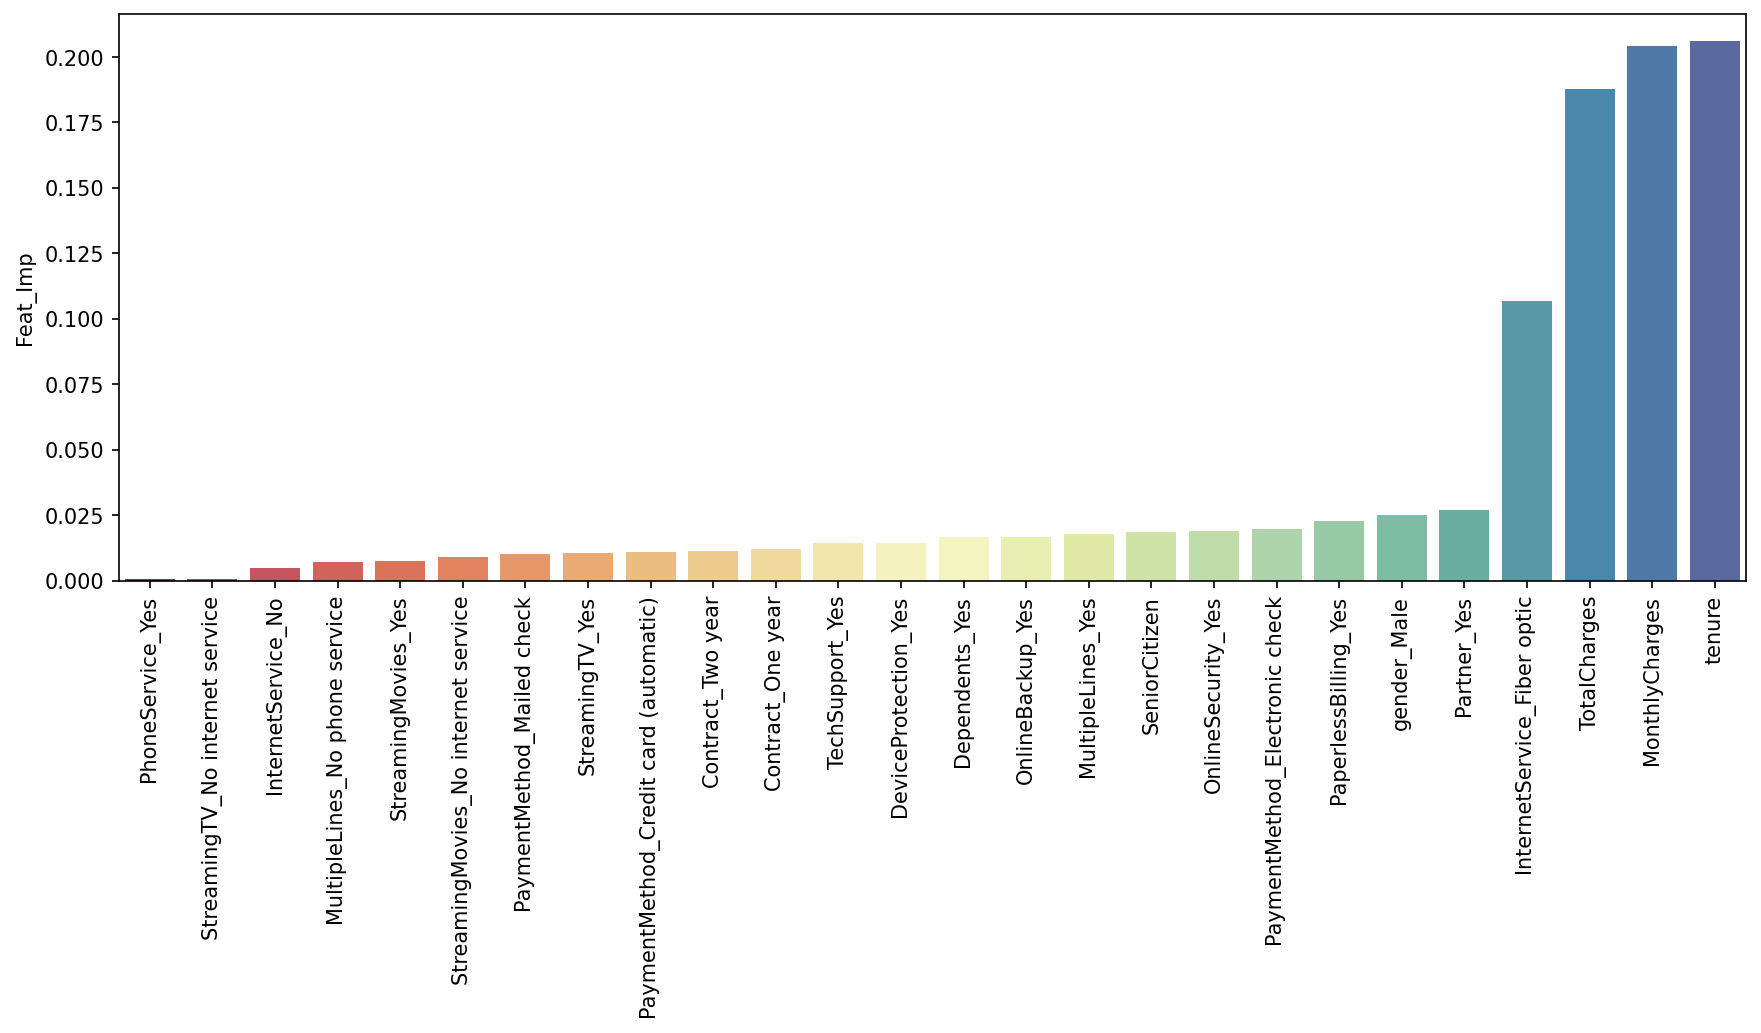

In [214]:
plt.figure(figsize=(14, 5), dpi=150)
sns.barplot(data=feat_imp, x=feat_imp.index, y="Feat_Imp", palette="Spectral")
plt.xticks(rotation=90);

**Random Forest**

In [215]:
acc = []
all_preds = []
for f in range(5):
    rfc = RandomForestClassifier(n_estimators=200)
    fold_acc, dt, preds = run_training(new_df, rfc, f)
    acc.append(fold_acc)
    all_preds.append(preds)

print(f"Mean Acc={np.mean(acc)}")

all_pred = np.hstack(all_preds)
print(confusion_matrix(y, all_pred))
print(classification_report(y, all_pred))

fold=0, acc=0.7825159914712153
fold=1, acc=0.8031272210376688
fold=2, acc=0.7916073968705548
fold=3, acc=0.7972972972972973
fold=4, acc=0.802275960170697
Mean Acc=0.7953647733694866
[[4632  531]
 [ 942  927]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      5163
           1       0.64      0.50      0.56      1869

    accuracy                           0.79      7032
   macro avg       0.73      0.70      0.71      7032
weighted avg       0.78      0.79      0.78      7032



**AdaBoost**

In [216]:
acc = []
all_preds = []
for f in range(5):
    ada_model = AdaBoostClassifier(n_estimators=200)
    fold_acc, dt, preds = run_training(new_df, ada_model, f)
    acc.append(fold_acc)
    all_preds.append(preds)

print(f"Mean Acc={np.mean(acc)}")

all_pred = np.hstack(all_preds)
print(confusion_matrix(y, all_pred))
print(classification_report(y, all_pred))

fold=0, acc=0.7867803837953091
fold=1, acc=0.8116560056858564
fold=2, acc=0.8051209103840683
fold=3, acc=0.798719772403983
fold=4, acc=0.8065433854907539
Mean Acc=0.8017640915519941
[[4617  546]
 [ 880  989]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      5163
           1       0.64      0.53      0.58      1869

    accuracy                           0.80      7032
   macro avg       0.74      0.71      0.72      7032
weighted avg       0.79      0.80      0.79      7032



**GradientBoosting**

In [217]:
acc = []
all_preds = []
for f in range(5):
    gbc_model = GradientBoostingClassifier(n_estimators=200)
    fold_acc, dt, preds = run_training(new_df, gbc_model, f)
    acc.append(fold_acc)
    all_preds.append(preds)

print(f"Mean Acc={np.mean(acc)}")

all_pred = np.hstack(all_preds)
print(confusion_matrix(y, all_pred))
print(classification_report(y, all_pred))

fold=0, acc=0.7882018479033405
fold=1, acc=0.8137882018479033
fold=2, acc=0.8051209103840683
fold=3, acc=0.7980085348506402
fold=4, acc=0.810099573257468
Mean Acc=0.8030438136486839
[[4631  532]
 [ 889  980]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      5163
           1       0.65      0.52      0.58      1869

    accuracy                           0.80      7032
   macro avg       0.74      0.71      0.72      7032
weighted avg       0.79      0.80      0.79      7032



**XGBoost**

In [218]:
acc = []
all_preds = []
for f in range(5):
    xgb_model = XGBClassifier(use_label_encoder=False)
    fold_acc, dt, preds = run_training(new_df, xgb_model, f)
    acc.append(fold_acc)
    all_preds.append(preds)

print(f"Mean Acc={np.mean(acc)}")

all_pred = np.hstack(all_preds)
print(confusion_matrix(y, all_pred))
print(classification_report(y, all_pred))

fold=0, acc=0.7931769722814499
fold=1, acc=0.8208955223880597
fold=2, acc=0.8086770981507824
fold=3, acc=0.7965860597439545
fold=4, acc=0.8079658605974396
Mean Acc=0.8054603026323373
[[4649  514]
 [ 888  981]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      5163
           1       0.66      0.52      0.58      1869

    accuracy                           0.80      7032
   macro avg       0.75      0.71      0.73      7032
weighted avg       0.79      0.80      0.79      7032



**Logistic Regression**

In [219]:
acc = []
all_preds = []
for f in range(5):
    lrcv_model = LogisticRegressionCV(max_iter=100000)
    fold_acc, lr, preds = run_training2(new_df, lrcv_model, f)
    acc.append(fold_acc)
    all_preds.append(preds)

print(f"Mean Acc={np.mean(acc)}")

all_pred = np.hstack(all_preds)
print(confusion_matrix(y, all_pred))
print(classification_report(y, all_pred))

fold=0, acc=0.744136460554371
fold=1, acc=0.7668798862828714
fold=2, acc=0.7809388335704125
fold=3, acc=0.7553342816500711
fold=4, acc=0.751778093883357
Mean Acc=0.7598135111882166
[[4249  914]
 [ 811 1058]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      5163
           1       0.54      0.57      0.55      1869

    accuracy                           0.75      7032
   macro avg       0.69      0.69      0.69      7032
weighted avg       0.76      0.75      0.76      7032



**Support Vector Classifier**

In [220]:
acc = []
all_preds = []
for f in range(5):
    svc_model = SVC(C=1000)
    fold_acc, svc, preds = run_training(new_df, svc_model, f)
    acc.append(fold_acc)
    all_preds.append(preds)

print(f"Mean Acc={np.mean(acc)}")

all_pred = np.hstack(all_preds)
print(confusion_matrix(y, all_pred))
print(classification_report(y, all_pred))

fold=0, acc=0.7818052594171997
fold=1, acc=0.7910447761194029
fold=2, acc=0.7837837837837838
fold=3, acc=0.7802275960170697
fold=4, acc=0.794452347083926
Mean Acc=0.7862627524842762
[[4840  323]
 [1194  675]]
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      5163
           1       0.68      0.36      0.47      1869

    accuracy                           0.78      7032
   macro avg       0.74      0.65      0.67      7032
weighted avg       0.77      0.78      0.76      7032



**KNeighbors Classifer**

In [221]:
acc = []
all_preds = []
for f in range(5):
    knn_model = KNeighborsClassifier(n_neighbors=10)
    fold_acc, svc, preds = run_training(new_df, knn_model, f)
    acc.append(fold_acc)
    all_preds.append(preds)

print(f"Mean Acc={np.mean(acc)}")

all_pred = np.hstack(all_preds)
print(confusion_matrix(y, all_pred))
print(classification_report(y, all_pred))

fold=0, acc=0.767590618336887
fold=1, acc=0.7945984363894811
fold=2, acc=0.7908961593172119
fold=3, acc=0.7809388335704125
fold=4, acc=0.7887624466571835
Mean Acc=0.7845572988542353
[[4801  362]
 [1173  696]]
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      5163
           1       0.66      0.37      0.48      1869

    accuracy                           0.78      7032
   macro avg       0.73      0.65      0.67      7032
weighted avg       0.76      0.78      0.76      7032



### Final Conclusions

- From random forest algorithm, monthly contract, tenure and total charges are the most important predictor variables to predict churn.
- The type of MonthlyCharges and PaperlessBilling has a strict relationship with churned clients, More number of monthly charges could lead a client to leave the service.
- The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA
- Tenure, Contract_Month to Month, Montly Charges, Total charges and Tech support no seem to contribute the most to the churn (Top 5)
- From the distribution plots, it can be inferred that customers make up their mind to terminate within the first 10 months
- Also, customers with a two year contract are less likely to churn than a month to month contract
- Additionaly customer support are good measures to prevent the company from losing customers. Also as inferred above, customer support enables multiple subscribers

